Names and NetIDs: Saumya Sharma (ss2944), Naina Pai (np288), Alexandra Barry (anb67), Thomas Neumeyer (tjn46)

# Introduction

### Abstract

In the following report, we will attempted to identify whether a relationship exists between the U.S. economic environment and the performance of the North American movie industry. Specifically, we will looked at the following questions:
* How does the economy affect the overall number of tickets sold?
* How does the economy affect the performance of different genres?
Through a wide array of analysis, we have determined that the relationship between the economy and overall number of tickets sold is extremely strong. However, when take a closer look at the relationship between economic performance and genre market share, we found that most genres maintain a small but consistent market share, but the adventure and drama genre are strongly affected. The relationship is as follows...one rises, one falls, linear relatinship, etc. 

### Background

(literally none of this is right, need to do research ^.^) In recent years, the movie industry is becoming more globalized and finding the need to balance the sanctity of box-office premieres with the streaming demands. Ticket sales are dropping and movie theaters are becoming experiential instead of the primary medium for movie-goers. Moreover, market volatility is increasing, with three economic downturns in the past fifty years with only a few in the past hundered. By identifying how economic trends impact movie ticket sales and how economic performance affects movie genre preferences, the box-office movie industry can get a better pulse on consumer economic response. Specifically, companies can figure out whether they should releasing more box-office movies, and whether they should target a specific genre.


### Composition

**Dataset Overview**

To do so, we have compiled a dataset that contains the following information:
* Attributes: Total box office tickets sold in North America, market share based on genre in North America, annual % change in U.S. GDP, and change in annual % change of national U.S. income in chained dollars
* Observations: The data spans the years 1995-2018

We specifically measure genres based on market share to remove any variation atrributable to change in movie tickets sold. Additionally we use GDP and income because GDP enables us to measure the health of the United States while income measures the economic health of individual consumers. We use chained dollars for income to account for inflation. 

This data is not designed to represent a larger population or to be extrapolated geographically. We are specifically looking at how the preformance of the U.S. market impacts the performance of the North American box-office movie industry.

**Dataset Sources**

This dataset has two key components: movie information and economic information. 

Movie information was scraped from the Numbers, a data analytics organization with the following mission: 'The Numbers was officially launched on October 17th, 1997 as a free resource for industry professionals, the investment community, and movie fans to track business information on movies.' The data collection was funded by Nash Information Services, a movide industry consulting service.

Economic data from the U.S. Bureau of Economic Analysis (BEA) in the form of a csv. The government keeps track major economic indicators to aid them in making economic decisions. This data was funded by the U.S. government.

People were not involved in any of the data collection.

**Data Preparation and Preprocessing**

Ticket sales was recorded by ticket sales. Market share by genre was found by first sorting movies based on eleven key genres. From there, the number of tickets sold for movies under a specific genre during a specific year were summed and divided by the total number of tickets sold. Government data is collected and analyzed the the BEA. 

Additionally, in our creation of the data, we did some processing. First, we selected the data range 1995-2018 because the Numbers data began at 1995 and we wanted to ensure that the annual data was in its entirety and felt that 2019 data might not be as accurate. A

We also created an "Other" genre category, for genres such as Westerns, which have a market share of less than 1%. We decided to do this because if a genre captures less than one percent in the market, then any changes in them could be due to noise. For example, maybe a specific movie becomes really famous and draws attention to the genre. This does not mean that economic changes impacted consumer preferences. Moreover, since the market share is so low, any variation is magnified in proprtion to the data. 

**Potential Influences on the Data**

Two key sources could impact the data. First, illegal movie streaming or "pirating" movies is a major concern in the box-office industry. Therefore, number of tickets purchased does not necessarily represent number of views. Secondly, movies are sorted based on genre, but a movie could fall under two different catergories, especially a popular one. This may cause a skew in favor of one genre over the other. 

# Data Analytics

## Data Summary

In [1]:
import sys
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.special import comb
from scipy.stats import spearmanr

In [2]:
data=pd.read_csv('data.csv', index_col=0)

In [114]:
col = data.columns[:len(data.columns)-3]
income = data.columns[-1]
headings=data.columns[:]
summary = data.describe()
headings

Index(['Adventure Market Share', 'Action Market Share', 'Drama Market Share',
       'Comedy Market Share', 'Thriller-or-Suspense Market Share',
       'Horror Market Share', 'Romantic-Comedy Market Share',
       'Musical Market Share', 'Other Genres Market Share', 'Total Tickets',
       'GDP % Growth', '% Income Annual Change, Chained Dollars'],
      dtype='object')

In [121]:
stats = pd.DataFrame()
for c in headings:
    stats[c]=[summary[c][5],summary[c][1],summary[c][2]]
stats.index = ['Med','Mean', 'StDev']

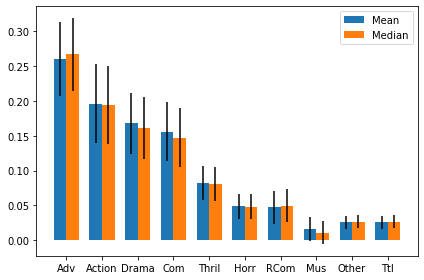

In [120]:
means =stats.loc['Mean']
stdev = stats.loc['StDev']
med = stats.loc['Med']

ind = np.arange(10)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, means, width, yerr=stdev, label='Mean')
rects2 = ax.bar(ind + width/2, med, width, yerr=stdev, label='Median')



#ax.set_ylabel('Scores')
#ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(['Adv', 'Action', 'Drama','Com', 'Thril', 'Horr', 'RCom','Mus', 'Other', 'Ttl', 'GDP', 'Inc'])
ax.legend()



fig.tight_layout()


plt.show()

### Observations



## GDP Impact on Tickets Sold

## Income Impact on Tickets Sold

## GDP Impact on Market Share of Genres

## Income Impact on Market Share of Genres

### Line of Best Fit and Scatter Plot

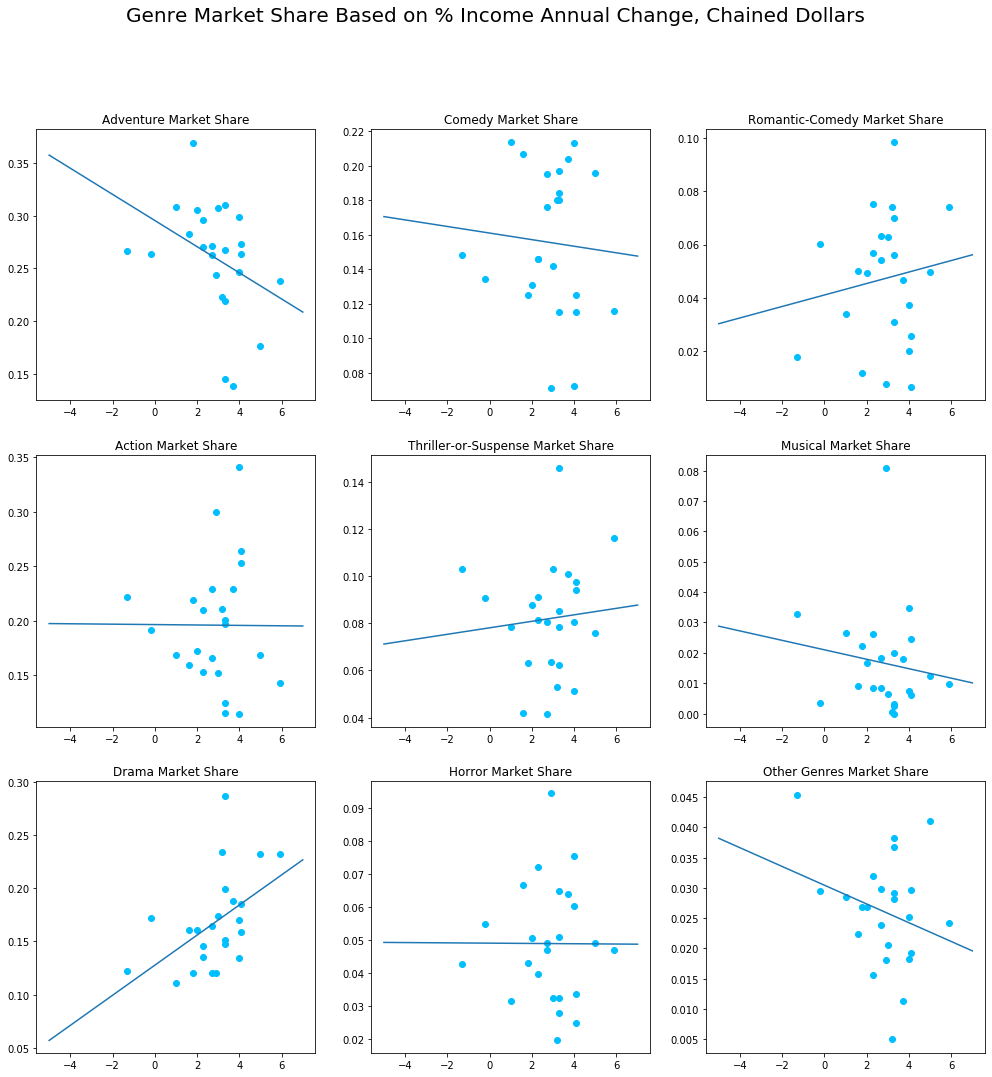

In [6]:
xaxs = 0
yaxs = 0

fig, axs = plt.subplots(3, 3, figsize=(17, 17))
fig.suptitle('Genre Market Share Based on ' + income, fontsize=20)

for c in col:
    #CREATING THE LINE OF BEST FIT
    model = LinearRegression().fit(data[[income]], data[c])
    score= model.coef_[0]
    intercept=model.intercept_
    x = np.linspace(-5,7,100)
    y = score*x+intercept
    axs[xaxs, yaxs].plot(x, y)
    
    

    #CREATING THE SCATTERPLOT
    axs[xaxs, yaxs].scatter(data[income], data[c], color = 'deepskyblue')
    axs[xaxs, yaxs].set_title(c)
    #axs[xaxs, yaxs].set_xlabel(income)
    #axs[xaxs, yaxs].set_ylabel(c)
    xaxs +=1
    if xaxs == 3:
        xaxs = 0
        yaxs +=1

plt.show()

### Residuals StDev

In [9]:
for c in col:
    x=data[income]
    mean_x=x.mean()
    y=data[c]
    mean_y=y.mean()
    n=len(data[income])
    slope = np.sum((x - mean_x) * (y - mean_y)) / np.sum((y - mean_y)**2)
    intercept = mean_x - slope * mean_y
    predicted_x = y * slope + intercept
    residuals = x - predicted_x
    residual_std = np.sqrt(np.sum((residuals - residuals.mean())**2) / n)
    print(c)
    print('{:.3f}'.format(residual_std))

Adventure Market Share
1.414
Action Market Share
1.519
Drama Market Share
1.315
Comedy Market Share
1.515
Thriller-or-Suspense Market Share
1.513
Horror Market Share
1.519
Romantic-Comedy Market Share
1.504
Musical Market Share
1.503
Other Genres Market Share
1.466


### Finding r

In [13]:
rvalues=[]
for c in col:
    r= np.corrcoef(data[income], data[c])[0][1]
    rvalues.append(r)
    print(c, ':', '{:.3f}'.format(r))

Adventure Market Share : -0.365
Action Market Share : -0.005
Drama Market Share : 0.500
Comedy Market Share : -0.070
Thriller-or-Suspense Market Share : 0.089
Horror Market Share : -0.004
Romantic-Comedy Market Share : 0.139
Musical Market Share : -0.142
Other Genres Market Share : -0.261


In [24]:
relationship=[]
for i in range(len(col)):
    if abs(rvalues[i])>0.3:
        relationship.append(col[i])
        print(col[i], rvalues[i])

Adventure Market Share -0.36537483796814235
Drama Market Share 0.49976989083829354


### Hypothesis Testing

In [16]:
# permutation of data for a given genre c
def permuted_y(c):
    return np.random.permutation(data[c].copy())

def findtheslope(x,c):
    #creates a dataframe with a permutated y and returns the slope 
    #purpose: ensure that ny, ndf, and nmodel are local variable that can be rewritten with each function call
    ny=permuted_y(c)
    ndf=pd.DataFrame({'ny':ny})
    nmodel=LinearRegression().fit(x,ndf[['ny']])
    return nmodel.coef_[0][0]

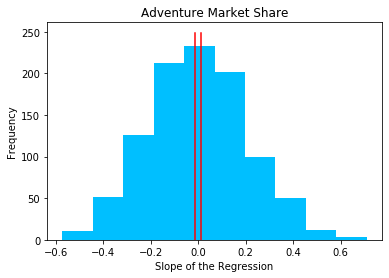

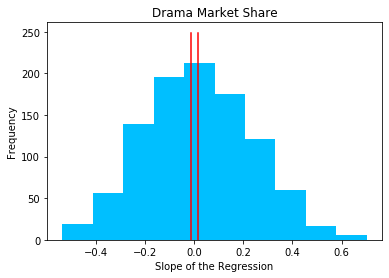

In [42]:
xaxs = 0
yaxs = 0
trials=1000


for c in relationship:  
    newarray = np.zeros(trials)
    for i in range(len(newarray)):
        newarray[i]=findtheslope(data[[c]],c)
    
    #Trying to find the value of the slope
    model = LinearRegression().fit(data[[income]], data[c])
    score= model.coef_[0]
    y = list(range(0, 250))
    x = np.full((1,250),score)[0]
    plt.plot(x, y, 'r')
    
    y = list(range(0, 250))
    x = np.full((1,250),(-1*score))[0]
    plt.plot(x, y, 'r')
    
    plt.hist(newarray, color = 'deepskyblue')
    plt.title(c)
    plt.xlabel('Slope of the Regression')
    plt.ylabel('Frequency')
    plt.show()

## Joint Models (?) Maybe Other Economic Parameter? Maybe Other Geographic Locations? Canada? We need more data lol